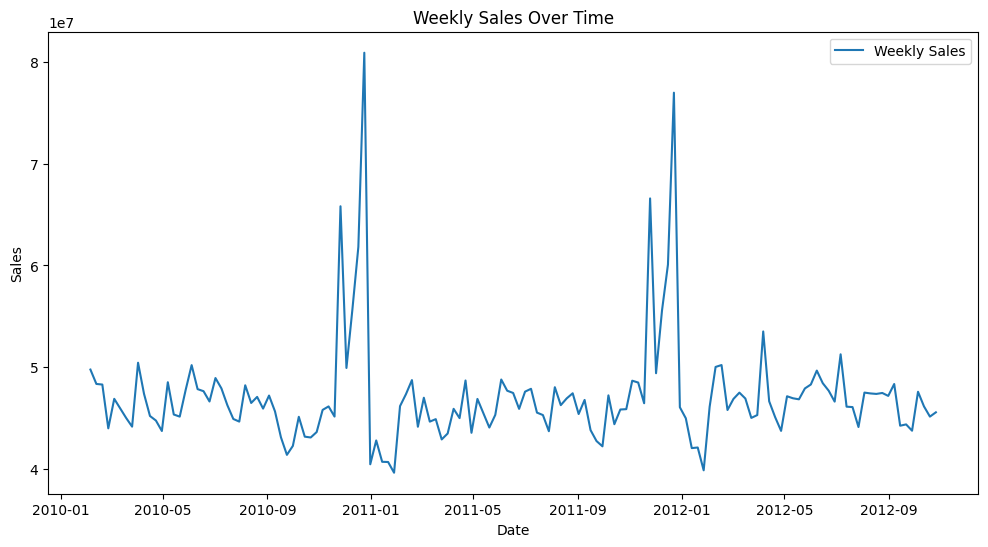

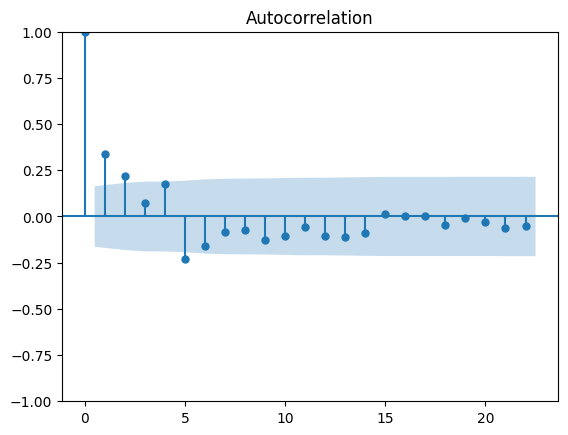

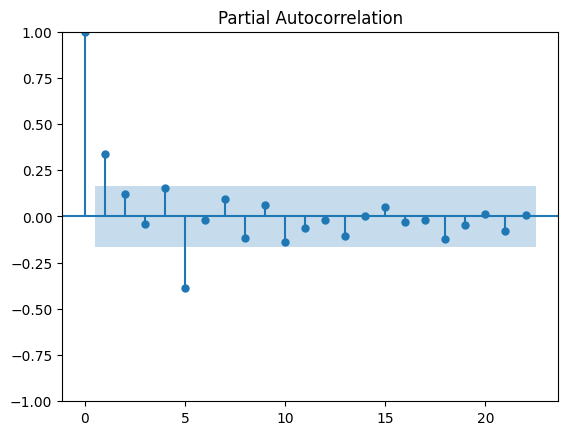

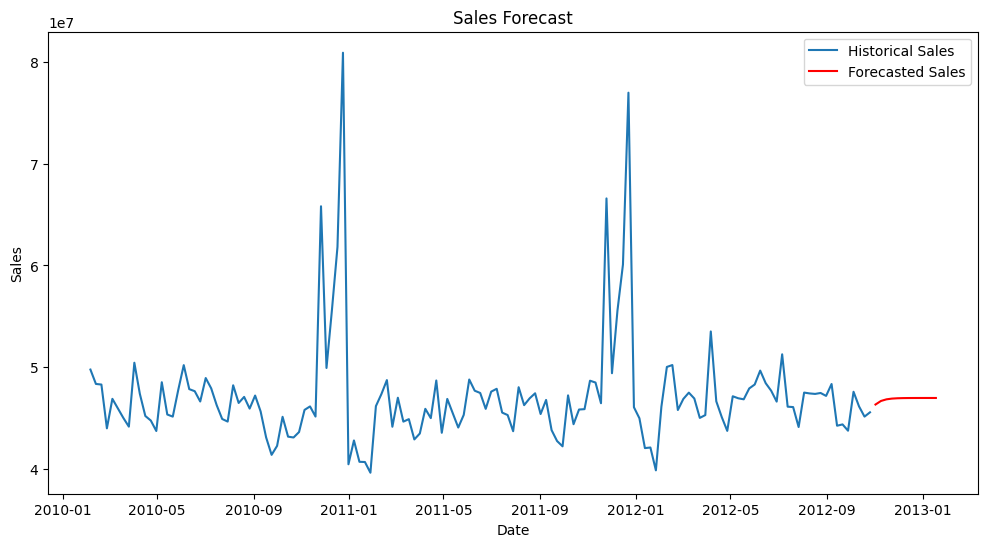

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

df = pd.read_csv('/Users/zoobiasyed/Downloads/Walmart.csv')

df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

sales_over_time = df.groupby('Date')['Weekly_Sales'].sum()

sales_over_time = sales_over_time.asfreq('W-FRI')  

plt.figure(figsize=(12, 6))
plt.plot(sales_over_time, label='Weekly Sales')
plt.title('Weekly Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

plot_acf(sales_over_time)
plot_pacf(sales_over_time)
plt.show()

model = ARIMA(sales_over_time, order=(1, 1, 1))  
model_fit = model.fit()

forecast = model_fit.forecast(steps=12)

plt.figure(figsize=(12, 6))
plt.plot(sales_over_time.index, sales_over_time, label='Historical Sales')
plt.plot(forecast.index, forecast, label='Forecasted Sales', color='red')
plt.title('Sales Forecast')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()
